# Creating a GUI tool with python – NRC Chignecto

---

**Lab**: In_coast Lab  
**Author**: C. Hart  
**Date**: 2024-09-12  

Notebook that Develops a visulaizaiotn tool for results from NRC Chignecto project

---

In [4]:
%%capture
# ^Command to not print anything from this cell -- makes notebook less messy sometimes
# Import required modules
import easygui
import pandas as pd
import glob
import os
import sys
import numpy as np
import pyrsktools
from pyrsktools import RSK as RSK
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from openpyxl import load_workbook
from scipy.fft import fft, ifft
import statsmodels.api as sm
from scipy.signal import welch
import os
import zipfile
import easygui
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
sys.path.append(r'C:\Users\S1495478\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\hoboreader')

In [62]:
# tif_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
tif_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\raster_nb_1.tif"

shoreline_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge.shp"
shoreline_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge.dbf"

dyke_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"
dyke_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.dbf"

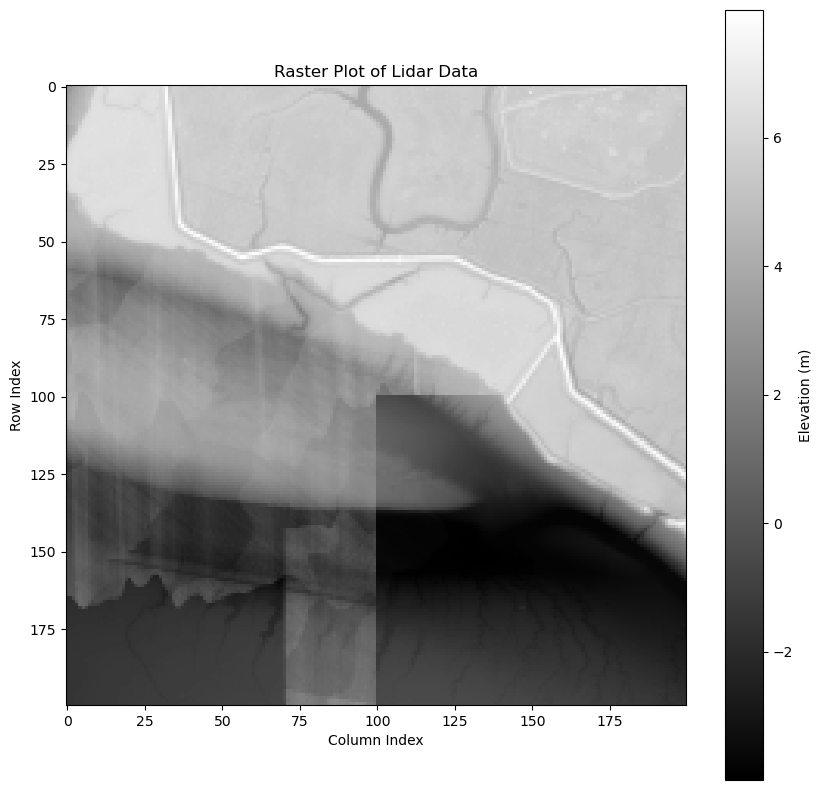

In [64]:
import rasterio
import matplotlib.pyplot as plt


# Open the TIF file using rasterio
try:
    with rasterio.open(tif_path) as src:
        # Read the first band of the raster
        raster_data = src.read(1)
        
        # Plot the raster data
        plt.figure(figsize=(10, 10))
        plt.imshow(raster_data, cmap='gray')
        plt.colorbar(label='Elevation (m)')  # Adjust label based on your data
        plt.title('Raster Plot of Lidar Data')
        plt.xlabel('Column Index')
        plt.ylabel('Row Index')
        plt.show()

except Exception as e:
    print(f"Error loading TIF file: {e}")

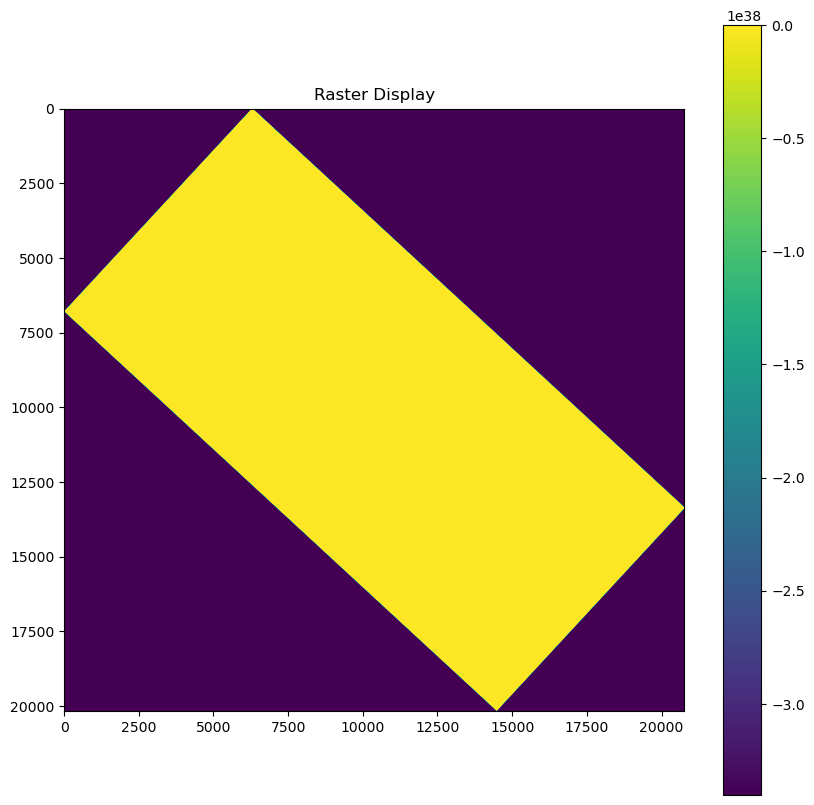

In [28]:
tif_path = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\20210801_Aulac_Lidar_DEM_prjUTM20N_hcsNAD83CSRSv7_vcsCGVD2013a.tif"

import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

# Open the raster file
with rasterio.open(tif_path) as src:
    # Read the data
    band1 = src.read(1)
    
    # Get the metadata
    meta = src.meta
    
    # Display the raster
    plt.figure(figsize=(10, 10))
    plt.imshow(band1, cmap='viridis')
    plt.colorbar()
    plt.title('Raster Display')
    plt.show()

In [34]:
import folium
import numpy as np
import rasterio
from rasterio.plot import reshape_as_image
from PIL import Image

# Read DEM data
with rasterio.open(tif_path) as src:
    dem_data = src.read(1)
    transform = src.transform
    bounds = src.bounds

# Convert DEM data to an image
dem_image = Image.fromarray(np.uint8(255 * (dem_data - np.min(dem_data)) / (np.max(dem_data) - np.min(dem_data))))

# Save the image
dem_image_path = 'dem_image.png'
dem_image.save(dem_image_path)

# Create a folium map
m = folium.Map(location=[(bounds.top + bounds.bottom) / 2, (bounds.left + bounds.right) / 2], zoom_start=12)

# Add the DEM image to the folium map
folium.raster_layers.ImageOverlay(
    image=dem_image_path,
    bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
    opacity=0.6,
    colormap='terrain'
).add_to(m)

# Save map to HTML file
m.save('dem_map.html')

C:\Users\S1495478\AppData\Local\Temp\ipykernel_23268\2599716364.py:14: RuntimeWarning: overflow encountered in multiply
  dem_image = Image.fromarray(np.uint8(255 * (dem_data - np.min(dem_data)) / (np.max(dem_data) - np.min(dem_data))))
C:\Users\S1495478\AppData\Local\Temp\ipykernel_23268\2599716364.py:14: RuntimeWarning: invalid value encountered in cast
  dem_image = Image.fromarray(np.uint8(255 * (dem_data - np.min(dem_data)) / (np.max(dem_data) - np.min(dem_data))))


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\S1495478\AppData\Local\anaconda3\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\S1495478\AppData\Local\Temp\ipykernel_23268\1763751393.py", line 35, in load_image
    self.image = Image.open(file_path)
                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\S1495478\AppData\Local\anaconda3\Lib\site-packages\PIL\Image.py", line 3323, in open
    im = _open_core(
         ^^^^^^^^^^^
  File "C:\Users\S1495478\AppData\Local\anaconda3\Lib\site-packages\PIL\Image.py", line 3305, in _open_core
    _decompression_bomb_check(im.size)
  File "C:\Users\S1495478\AppData\Local\anaconda3\Lib\site-packages\PIL\Image.py", line 3215, in _decompression_bomb_check
    raise DecompressionBombError(msg)
PIL.Image.DecompressionBombError: Image size (418897017 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


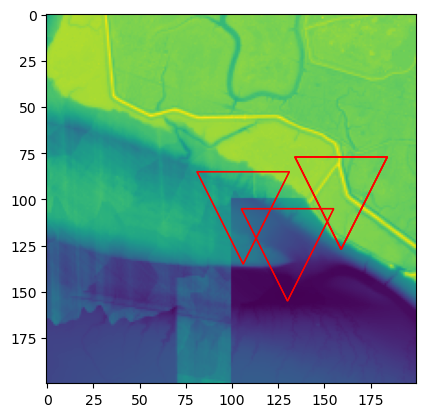

In [36]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.backends.backend_tkagg as tkagg
import numpy as np

class ImagePolygonApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive TIFF Viewer with Polygons")

        # Create a canvas for displaying the image
        self.canvas = tk.Canvas(root, width=800, height=600)
        self.canvas.pack(fill=tk.BOTH, expand=True)

        # Add a menu
        menu = tk.Menu(root)
        root.config(menu=menu)
        file_menu = tk.Menu(menu, tearoff=0)
        menu.add_cascade(label="File", menu=file_menu)
        file_menu.add_command(label="Open TIFF", command=self.load_image)
        file_menu.add_command(label="Exit", command=root.quit)

        # Variables for image and polygons
        self.image = None
        self.tk_image = None
        self.figure, self.ax = plt.subplots()
        self.polygons = []

    def load_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("TIFF files", "*.tif")])
        if file_path:
            self.image = Image.open(file_path)
            self.tk_image = ImageTk.PhotoImage(self.image)
            self.canvas.create_image(0, 0, image=self.tk_image, anchor=tk.NW)

            # Clear previous polygons
            self.ax.clear()
            self.ax.imshow(np.array(self.image))

            # Set up the interactive polygon drawing
            self.canvas.bind("<Button-1>", self.on_canvas_click)

    def on_canvas_click(self, event):
        # Example: Add a polygon with a fixed set of points
        polygon = Polygon([[event.x, event.y], [event.x + 50, event.y], [event.x + 25, event.y + 50]], closed=True, fill=None, edgecolor='r')
        self.ax.add_patch(polygon)
        self.polygons.append(polygon)

        # Update the plot
        self.figure.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = ImagePolygonApp(root)
    root.mainloop()

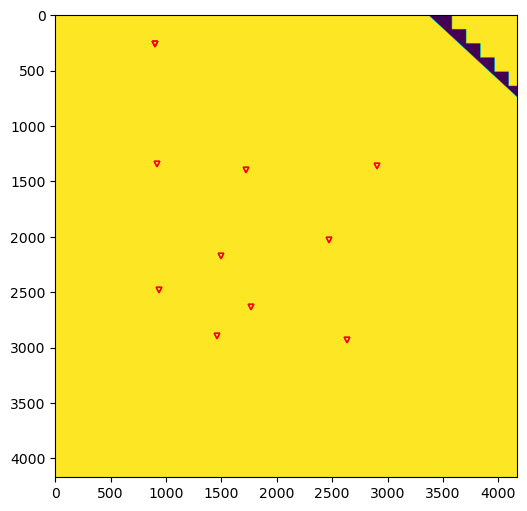

In [38]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.backends.backend_tkagg as tkagg
import numpy as np

class ImagePolygonApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive TIFF Viewer with Polygons")

        # Create a frame for the Matplotlib plot
        self.frame = tk.Frame(root)
        self.frame.pack(fill=tk.BOTH, expand=True)

        # Create a figure and axis for Matplotlib
        self.figure, self.ax = plt.subplots(figsize=(8, 6))
        self.canvas = tkagg.FigureCanvasTkAgg(self.figure, master=self.frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Add a menu
        menu = tk.Menu(root)
        root.config(menu=menu)
        file_menu = tk.Menu(menu, tearoff=0)
        menu.add_cascade(label="File", menu=file_menu)
        file_menu.add_command(label="Open TIFF", command=self.load_image)
        file_menu.add_command(label="Exit", command=root.quit)

        # Variables for image and polygons
        self.image = None
        self.polygons = []

    def load_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("TIFF files", "*.tif")])
        if file_path:
            self.image = Image.open(file_path)
            self.ax.clear()
            self.ax.imshow(np.array(self.image))
            self.polygons = []  # Clear previous polygons

            # Set up the interactive polygon drawing
            self.figure.canvas.mpl_connect('button_press_event', self.on_canvas_click)

    def on_canvas_click(self, event):
        if event.inaxes != self.ax:
            return

        # Example: Add a polygon with a fixed set of points
        polygon = Polygon([[event.xdata, event.ydata], [event.xdata + 50, event.ydata], [event.xdata + 25, event.ydata + 50]], closed=True, fill=None, edgecolor='r')
        self.ax.add_patch(polygon)
        self.polygons.append(polygon)

        # Update the plot
        self.figure.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = ImagePolygonApp(root)
    root.mainloop()

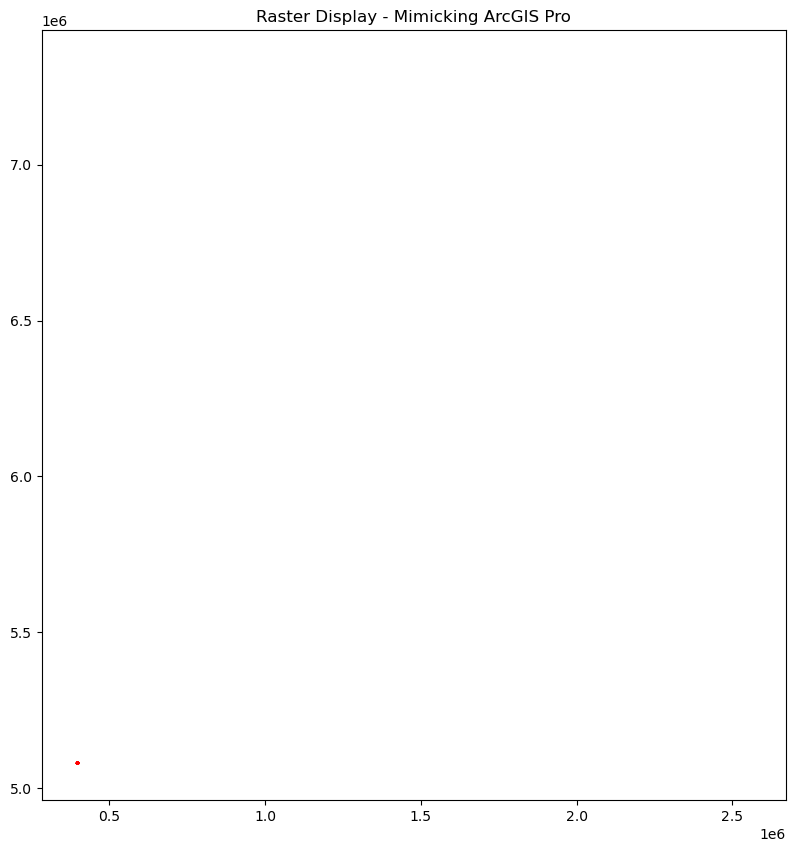

In [76]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

# Function to display a raster file with a colorbar
def display_raster(file_path):
    # Open the raster file
    with rasterio.open(file_path) as dataset:
        # Read the first band (for single-band rasters)
        raster_data = dataset.read(1)

        # Plot the raster data using imshow for mappable object
        # Plot the raster using imshow
        fig, ax = plt.subplots(figsize=(10, 10))
        
        plt.title('Raster Display - Mimicking ArcGIS Pro')

        # Display the image using imshow to get a mappable object
        img = ax.imshow(raster_data, cmap='viridis', extent=(dataset.bounds.left, dataset.bounds.right, dataset.bounds.bottom, dataset.bounds.top))

        # Import and plot polylines (shapefile or GeoJSON)
        polyline1 = gpd.read_file(polyline_path1)
        polyline1.plot(ax=ax, edgecolor='green', linewidth=2)  # Adjust color and line width as needed

        # Import and plot polylines (shapefile or GeoJSON)
        polyline2 = gpd.read_file(polyline_path2)
        polyline2.plot(ax=ax, edgecolor='red', linewidth=2)  # Adjust color and line width as needed


        # Set plot title and show the 
        # Add a colorbar
        # plt.colorbar(img)

        # Display the plot
        plt.show()

# Path to your exported raster file
tif_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
tif_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\raster_nb_1.tif"


polyline_path1 = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"  # Shapefile or GeoJSON
polyline_path2 = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge.shp"  # Shapefile or GeoJSON


display_raster(tif_path)

C:\Users\S1495478\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


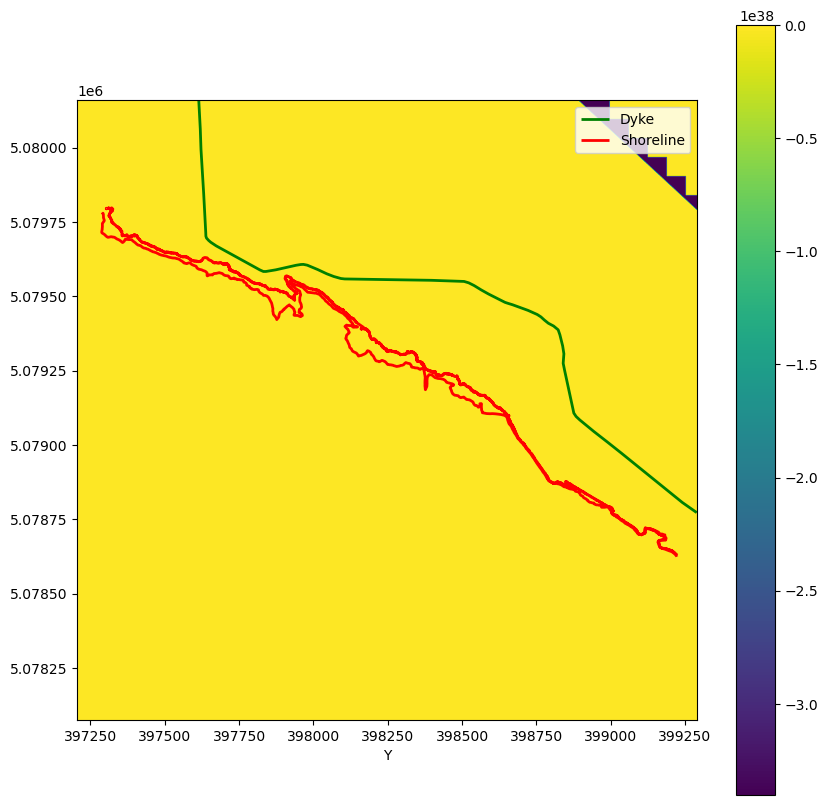

In [94]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

# Function to display raster and overlay polylines
def display_raster_with_polylines(raster_path, polyline_path):
    # Open and display the raster file
    with rasterio.open(raster_path) as dataset:
        raster_data = dataset.read(1)

        # Plot the raster using imshow
        fig, ax = plt.subplots(figsize=(10, 10))

        raster_mean = np.nanmean(raster_data)
        raster_data = np.where(np.isnan(raster_data), raster_mean, raster_data)

        img = ax.imshow(raster_data, cmap='viridis', extent=(dataset.bounds.left, dataset.bounds.right, dataset.bounds.bottom, dataset.bounds.top))

        # Add a colorbar
        plt.colorbar(img, ax=ax)

        # Import and plot polylines (shapefile or GeoJSON)
        polyline1 = gpd.read_file(polyline_path1)
        polyline1.plot(ax=ax, edgecolor='green', linewidth=2, label='Dyke')  # Adjust color and line width as needed

        # Import and plot polylines (shapefile or GeoJSON)
        polyline2 = gpd.read_file(polyline_path2)
        polyline2.plot(ax=ax, edgecolor='red', linewidth=2, label='Shoreline')  # Adjust color and line width as needed

        # Set plot title and show the combined result
        # plt.title('Raster with Polylines')
        plt.xlabel('X')
        plt.xlabel('Y')

        
        plt.legend()
        plt.show()

tif_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
# tif_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\raster_nb_1.tif"

shoreline_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge.shp"
shoreline_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge.dbf"

dyke_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"
dyke_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.dbf"

raster_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
# raster_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\raster_nb_1.tif"
# polyline_path = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"  # Shapefile or GeoJSON
polyline_path = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge.shp"  # Shapefile or GeoJSON


display_raster_with_polylines(raster_path, polyline_path)

C:\Users\S1495478\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


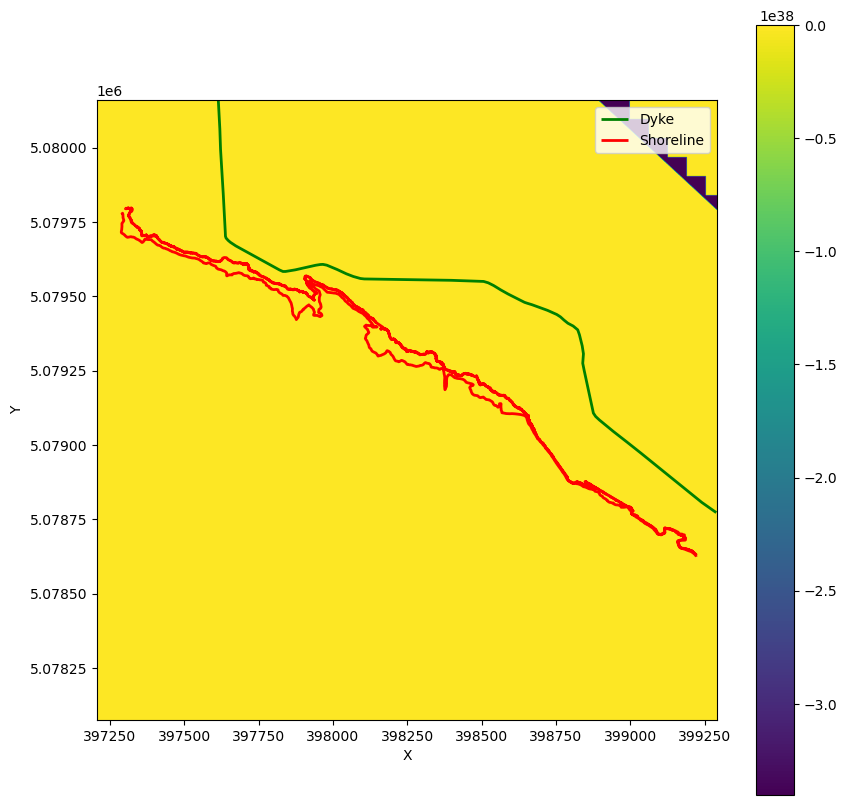

In [96]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to display raster and overlay polylines
def display_raster_with_polylines(raster_path, polyline_path1, polyline_path2):
    # Open and display the raster file
    with rasterio.open(raster_path) as dataset:
        raster_data = dataset.read(1)

        # Plot the raster using imshow
        fig, ax = plt.subplots(figsize=(10, 10))

        raster_mean = np.nanmean(raster_data)
        raster_data = np.where(np.isnan(raster_data), raster_mean, raster_data)

        img = ax.imshow(raster_data, cmap='viridis', extent=(dataset.bounds.left, dataset.bounds.right, dataset.bounds.bottom, dataset.bounds.top))

        # Add a colorbar
        plt.colorbar(img, ax=ax)

        # Import and plot polylines (shapefile or GeoJSON)
        polyline1 = gpd.read_file(polyline_path1)
        polyline1.plot(ax=ax, edgecolor='green', linewidth=2, label='Dyke')  # Adjust color and line width as needed

        # Import and plot polylines (shapefile or GeoJSON)
        polyline2 = gpd.read_file(polyline_path2)
        polyline2.plot(ax=ax, edgecolor='red', linewidth=2, label='Shoreline')  # Adjust color and line width as needed

        # Set plot title and show the combined result
        plt.xlabel('X')
        plt.ylabel('Y')

        # Set x and y axis limits based on raster bounds or manually
        plt.xlim(dataset.bounds.left, dataset.bounds.right)  # Modify as needed for custom limits
        plt.ylim(dataset.bounds.bottom, dataset.bounds.top)  # Modify as needed for custom limits

        plt.legend()
        plt.show()

# File paths
raster_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
shoreline_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge.shp"
dyke_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"

# Display the raster with polylines
display_raster_with_polylines(raster_path, dyke_path_shp, shoreline_path_shp)